# Explore here

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [111]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


To properly apply the linear regression algorithm to the dataset, we have to transform the categorical variables into numerical variables.

In [112]:
df["sex"] = df["sex"].replace({"female": 1, "male": 0})

/tmp/ipykernel_493/4143609771.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"female": 1, "male": 0})


In [113]:
df["smoker"] = df["smoker"].replace({"yes": 1, "no": 0})

/tmp/ipykernel_493/2179532465.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"] = df["smoker"].replace({"yes": 1, "no": 0})


In [114]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [115]:
df["region"] = df["region"].replace({"southwest": 1, "southeast": 2,"northwest": 3, "northeast": 4})

/tmp/ipykernel_493/625725082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["region"] = df["region"].replace({"southwest": 1, "southeast": 2,"northwest": 3, "northeast": 4})


In [116]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [118]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


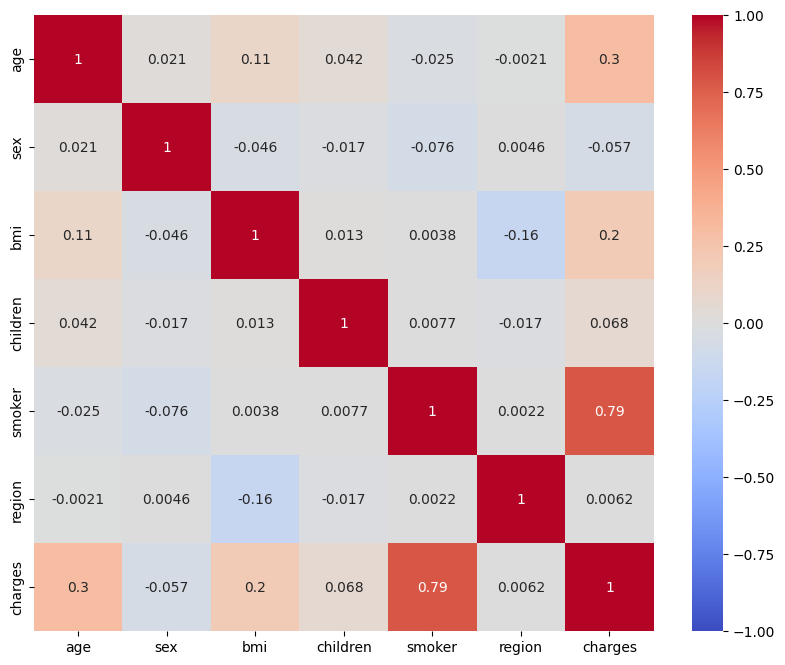

In [119]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), vmin = -1, vmax = 1, annot = True, cmap='coolwarm')
plt.show()

The table provided is a correlation matrix showing the pairwise correlations between variables, including the objective variable 'charges' and other predictor variables. Here's the interpretation of the relationships:

- age and charges: The correlation coefficient is 0.3, indicating a weak positive relationship. As age increases, insurance charges tend to increase slightly.

- sex and charges: The correlation coefficient is -0.057, suggesting a very weak negative relationship. The impact of sex on charges is negligible.

- bmi and charges: The correlation coefficient is 0.2, indicating a weak positive relationship. Higher BMI is associated with slightly higher charges.

- children and charges: The correlation coefficient is 0.068, showing a very weak positive relationship. The number of children has minimal impact on charges.

- smoker and charges: The correlation coefficient is 0.79, indicating a strong positive relationship. Being a smoker is strongly associated with higher insurance charges.

- region and charges: The correlation coefficient is 0.0062, suggesting almost no relationship. The region has virtually no impact on charges.

Key Takeaways:
- Strongest Predictor: 'smoker' has the strongest influence on 'charges'.

- Weak Predictors: 'age' and 'bmi' have modest positive effects.

- Negligible Predictors: 'sex', 'children', and 'region' have little to no impact on 'charges'.

This suggests that smoking status is the most significant factor in determining insurance charges, while other variables play minor or insignificant roles.

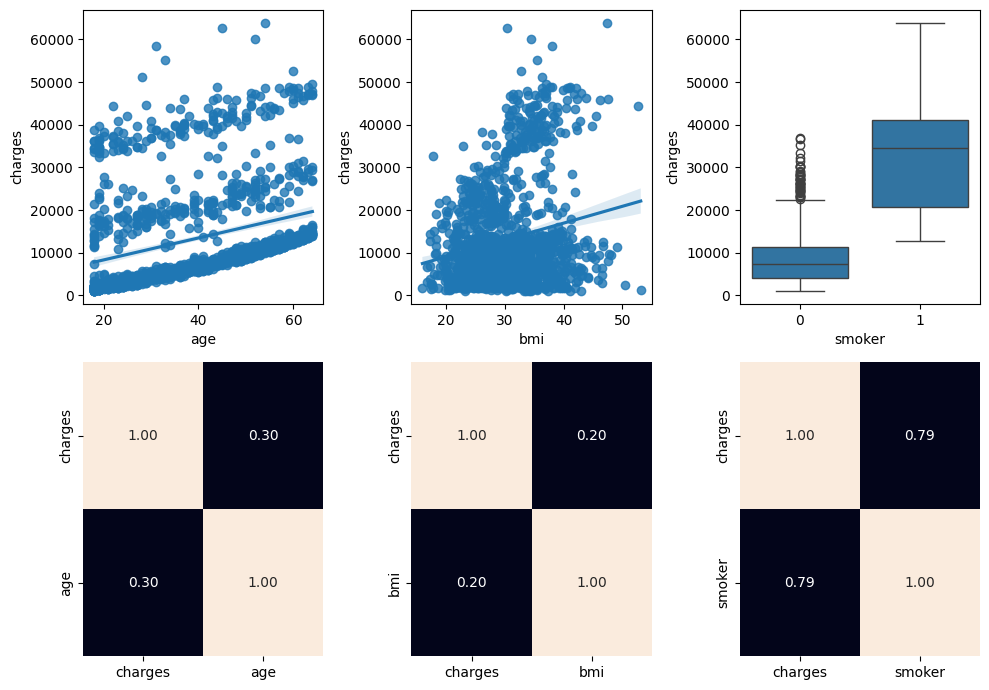

In [120]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.boxplot(ax = axis[0, 2], data = df, x = "smoker", y = "charges")
sns.heatmap(df[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()

plt.show()

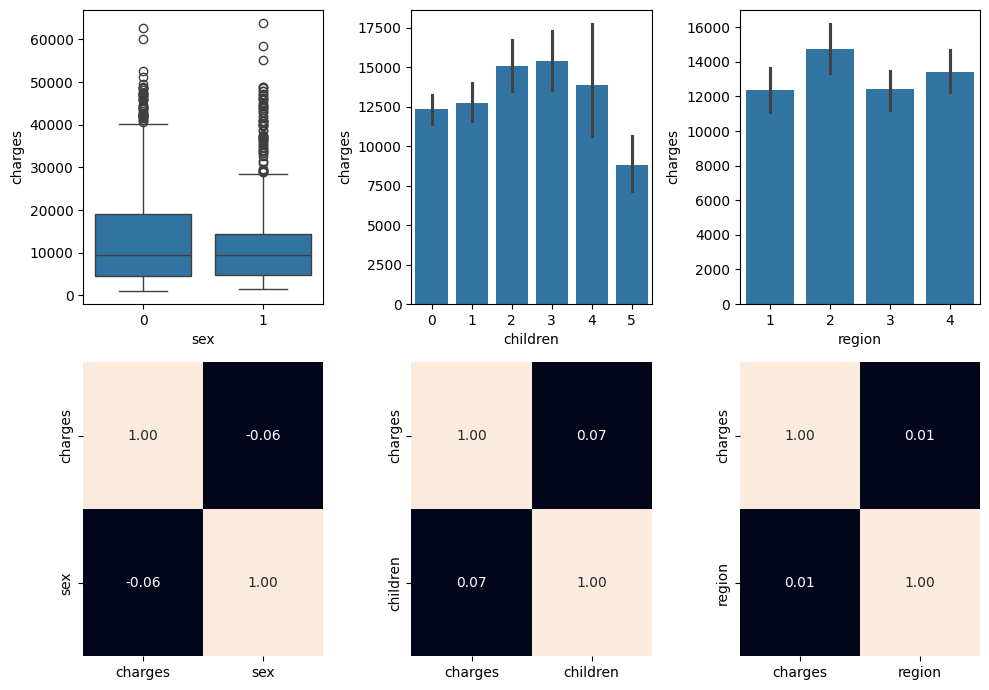

In [121]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.boxplot(ax = axis[0, 0], data = df, x = "sex", y = "charges")
sns.heatmap(df[["charges", "sex"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.barplot(ax = axis[0, 1], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.barplot(ax = axis[0, 2], data = df, x = "region", y = "charges")
sns.heatmap(df[["charges", "region"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()

plt.show()

Based on the graphs we can give these insights:

- Very weak predictors to be eliminated:
    - sex: Minimal/no difference in charges between sexes.
    - children: Insurance costs may not scale meaningfully with family size in this dataset.
    - region: Charges are similar across regions, with no significant variability.
- Strong predictors:
    - age: The graph likely shows a positive trend, where charges increase with age
    - bmi: The scatterplot may show a weak positive trend, but with high variance.
    - smoker: The graph likely shows two distinct groups: Smokers have significantly higher charges than non-smokers
 
- Key Takeaways
    - Model Simplification: Removing the weak predictors can reduce overfitting and improve interpretability.
    - Focus on Strong Predictors: Prioritize variables like smoker (strong correlation) and age/bmi (moderate correlation).
    - Statistical Justification: Low correlation + visual confirmation (graphs) supports their removal.



In [ ]:
df.drop(columns=['sex', 'children', 'region'], inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   bmi      1338 non-null   float64
 2   smoker   1338 non-null   int64  
 3   charges  1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [134]:
df.describe()

,age,bmi,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,0.204783,13270.422265
std,14.049960,6.098187,0.403694,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,0.000000,9382.033000
75%,51.000000,34.693750,0.000000,16639.912515
max,64.000000,53.130000,1.000000,63770.428010


According to the description of the dataset it would be recommended to:
- Variables to normalize:
    - bmi: Moderate range (15.96–53.13) and standard deviation (6.1).
    - age: Not strictly necessary (range 18–64), but scaling can help gradient-based models (e.g., regression, neural nets).
- Variables to Avoid Normalizing
    - smoker: Binary (0 or 1); normalization is redundant.
    - charges: Do not normalize the target variable for regression. Instead, consider log-transform if skewed.

In [138]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df[['bmi_scaled', 'age_scaled']] = scaler.fit_transform(df[['bmi', 'age']])

In [136]:
df['log_charges'] = np.log1p(df['charges'])

In [139]:
df

,age,bmi,smoker,charges,log_charges,bmi_scaled,age_scaled
0,19,27.900,1,16884.92400,9.734236,-0.453320,-1.438764
1,18,33.770,0,1725.55230,7.453882,0.509621,-1.509965
2,28,33.000,0,4449.46200,8.400763,0.383307,-0.797954
3,33,22.705,0,21984.47061,9.998137,-1.305531,-0.441948
4,32,28.880,0,3866.85520,8.260455,-0.292556,-0.513149
...,...,...,...,...,...,...,...
1333,50,30.970,0,10600.54830,9.268755,0.050297,0.768473
1334,18,31.920,0,2205.98080,7.699381,0.206139,-1.509965
1335,18,36.850,0,1629.83350,7.396847,1.014878,-1.509965
1336,21,25.800,0,2007.94500,7.605365,-0.797813,-1.296362


In [140]:
df = df[['age_scaled','bmi_scaled','smoker','log_charges']]

In [141]:
df

,age_scaled,bmi_scaled,smoker,log_charges
0,-1.438764,-0.453320,1,9.734236
1,-1.509965,0.509621,0,7.453882
2,-0.797954,0.383307,0,8.400763
3,-0.441948,-1.305531,0,9.998137
4,-0.513149,-0.292556,0,8.260455
...,...,...,...,...
1333,0.768473,0.050297,0,9.268755
1334,-1.509965,0.206139,0,7.699381
1335,-1.509965,1.014878,0,7.396847
1336,-1.296362,-0.797813,0,7.605365


In [143]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X_train = df_train.drop('log_charges', axis=1).reset_index(drop= True)
y_train = df_train['log_charges'].reset_index(drop= True)
X_test = df_test.drop('log_charges', axis=1).reset_index(drop= True)
y_test = df_test['log_charges'].reset_index(drop= True)   

In [144]:
X_train.head()

,age_scaled,bmi_scaled,smoker
0,0.483668,-1.757474,0
1,0.554869,-1.040599,0
2,0.910875,-0.952015,0
3,-0.014740,0.599846,0
4,1.053277,-1.508126,0


In [145]:
y_train.head()

0     9.126398
1     9.052009
2    10.207990
3     9.059265
4     9.431590
Name: log_charges, dtype: float64

In [146]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [147]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 8.791048916946416
Coefficients (b): [0.48911521 0.06797889 1.54841241]


In [148]:
y_pred = model.predict(X_test)
y_pred

array([ 8.93158845,  8.6721875 , 11.16075614,  8.97277042,  9.64975294,
        8.74616845,  7.99646008,  9.73523395,  8.25162343,  9.11008853,
        9.94897462,  8.85267182,  8.42361323, 10.70635453, 11.17796598,
       10.70315328,  9.26609888, 10.67739317,  8.99847477, 10.42941886,
        8.22085851,  8.94473763,  8.08439015,  8.29374735,  9.13855772,
        9.32871119,  9.56465148,  8.36299483,  9.01713059,  8.04666516,
        8.80346072,  9.42365335,  8.2038888 ,  8.35093776,  8.32370862,
        9.0947358 ,  8.10943507,  8.91462841, 10.71212657, 10.27836501,
        8.06431734,  8.19946089,  9.43315523,  9.42232483,  8.6316092 ,
        9.44507402,  8.19006087,  8.22531913, 10.5307308 ,  8.59139815,
        9.68251011,  8.03807846,  8.93861765,  8.00189164,  9.41787759,
        9.18305246,  8.41238287, 10.09520432,  9.47269718,  9.30024199,
        9.63232808,  8.60931946,  9.61062862,  8.82499289,  9.23893145,
        8.34802869,  9.65004139,  9.1890282 ,  8.20541359,  8.29

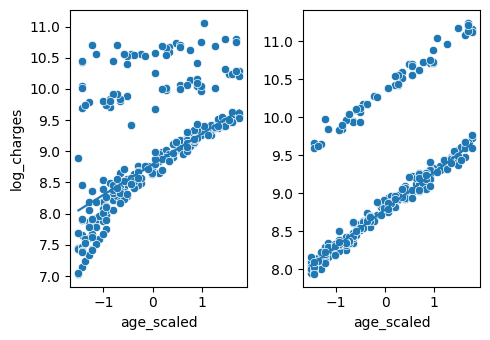

In [149]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([df_train, df_test])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: 8.791048916946416 + 0.48911521 * x

sns.scatterplot(ax = axis[0], data = df_test, x = "age_scaled", y = "log_charges")
sns.lineplot(ax = axis[0], x = df_test["age_scaled"], y = regression_equation(df_test["age_scaled"]))
sns.scatterplot(ax = axis[1], x = df_test["age_scaled"], y = y_pred)
sns.lineplot(ax = axis[1], x = df_test["age_scaled"], y = regression_equation(df_test["age_scaled"])).set(ylabel = None)

plt.tight_layout()

plt.show()

Left Graph (Original age vs. log_charges):

- Positive Trend: As age increases, log_charges generally rises, confirming the earlier correlation (age had a coefficient of 0.3 with raw charges).

- Potential Non-Linearity: The trend may curve slightly upward (exponential-like), suggesting:

    - Older individuals' insurance costs increase disproportionately.

    - A polynomial term (e.g., age²) might improve the model.

Right Graph (Scaled age_scaled vs. log_charges):

- Centered Data: age_scaled (mean=0, std=1) shows the same trend but with clearer interpretation of coefficients in regression models.

- Tighter Spread: Points are more clustered around the trend line, indicating standardization reduces scale-driven variance.

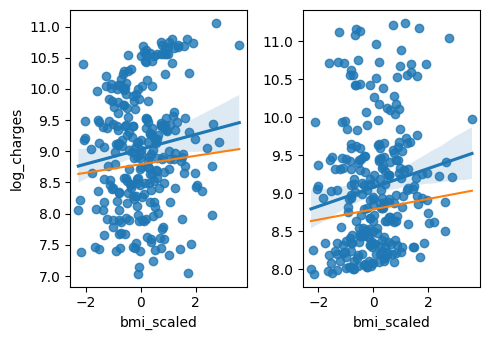

In [152]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([df_train, df_test])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: 8.791048916946416  + 0.06797889 * x

sns.regplot(ax = axis[0], data = df_test, x = "bmi_scaled", y = "log_charges")
sns.lineplot(ax = axis[0], x = df_test["bmi_scaled"], y = regression_equation(df_test["bmi_scaled"]))
sns.regplot(ax = axis[1], x = df_test["bmi_scaled"], y = y_pred)
sns.lineplot(ax = axis[1], x = df_test["bmi_scaled"], y = regression_equation(df_test["bmi_scaled"])).set(ylabel = None)

plt.tight_layout()

plt.show()

Weak Positive Trend:

- The scatterplot suggests a mild upward trend (consistent with the earlier correlation of 0.2 between raw bmi and charges).

- Higher BMI tends to associate with slightly higher log_charges, but the effect is modest compared to age or smoker.

High Variance:

- Points are widely scattered, indicating BMI alone is not a strong predictor.

- Outliers exist (e.g., low bmi_scaled with high log_charges, likely due to other factors like smoking).

Potential Threshold Effect:

- The trend may strengthen for higher BMI values (e.g., obesity range, bmi ≥ 30).

- Consider creating a binary feature (e.g., is_obese = 1 if bmi ≥ 30) to capture non-linear effects.

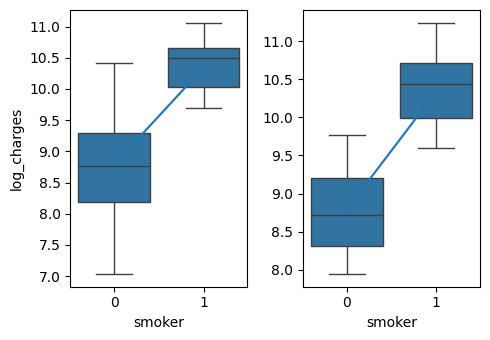

In [151]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([df_train, df_test])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: 8.791048916946416 + 1.54841241 * x

sns.boxplot(ax = axis[0], data = df_test, x = "smoker", y = "log_charges")
sns.lineplot(ax = axis[0], x = df_test["smoker"], y = regression_equation(df_test["smoker"]))
sns.boxplot(ax = axis[1], x = df_test["smoker"], y = y_pred)
sns.lineplot(ax = axis[1], x = df_test["smoker"], y = regression_equation(df_test["smoker"])).set(ylabel = None)

plt.tight_layout()

plt.show()

Stark Contrast Between Groups:

- Non-smokers (smoker=0):

    - log_charges clusters at lower values (likely ~8.0–9.5, or raw charges of ~$3,000–$14,000).

- Smokers (smoker=1):

    - log_charges is significantly higher (likely ~10.0–11.0, or raw charges of ~$22,000–$60,000).

Minimal Overlap:

- The distributions of log_charges for smokers and non-smokers are almost entirely separate, confirming the earlier strong correlation (0.79).

Outliers?

- A few non-smokers have higher log_charges (possibly due to age, BMI, or other factors).

Smoking is the Dominant Predictor:

- Smoking status explains most of the variance in insurance costs.

- This aligns with the EDA and correlation matrix.

In [154]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.20627479943015134
Coeficiente de determinación: 0.7705133649785598


Key Takeaways
- Model is Performing Well:

    - The log-transform helped normalize the target variable and improved metrics.

    - 77% explained variance is solid, but pushing for >80% R² is ideal.

- Next Steps:

    - Diagnose Residuals: Plot residuals vs. predicted values to check for patterns (heteroscedasticity).

    - Compare Models: Test if adding interactions/non-linear terms improves R² or reduces MSE further.